In [1]:

# Libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn models: Polynomial, Ridge, and Lasso regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


In [2]:

# Set seed for reproducibility
np.random.seed(42)

# Generate 100 sorted values between 0 and 5
X = np.sort(5 * np.random.rand(100, 1), axis=0)

# Generate targets using sine function + Gaussian noise
noise = np.random.normal(0, 0.2, X.shape[0])
y = np.sin(X).ravel() + noise


In [3]:

# Display shapes of input and target arrays
X.shape, y.shape


((100, 1), (100,))

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

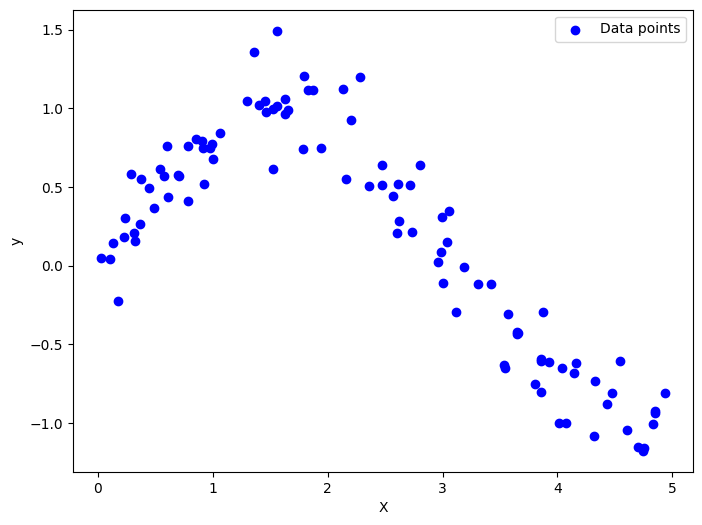

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [6]:
# Define polynomial degree
degree = 10

# Regular Polynomial Regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)

# Ridge Regression (L2)
ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
ridge_reg.fit(X_train, y_train)

# Lasso Regression (L1)
lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1, max_iter=10000))
lasso_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.353e+00, tolerance: 4.021e-03
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('lasso', Lasso(alpha=0.1, max_iter=10000))])

In [7]:
ridge_reg.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=10)),
  ('ridge', Ridge())],
 'transform_input': None,
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=10),
 'ridge': Ridge(),
 'polynomialfeatures__degree': 10,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

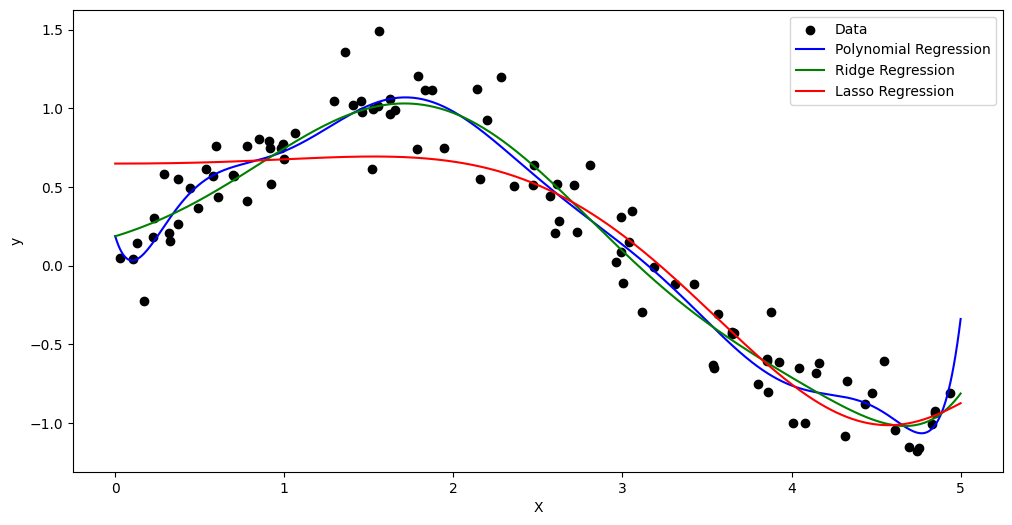

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='black', label='Data')

X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
plt.plot(X_plot, poly_reg.predict(X_plot), label='Polynomial Regression', color='blue')
plt.plot(X_plot, ridge_reg.predict(X_plot), label='Ridge Regression', color='green')
plt.plot(X_plot, lasso_reg.predict(X_plot), label='Lasso Regression', color='red')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()